<a href="https://colab.research.google.com/github/Amwt24/Arduino-Test/blob/main/testWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [2]:
import pandas as pd
import unicodedata
import re

#Para despues, repasar ley de bendfort, distintos tipos de formatos

In [26]:
# Crear un DataFrame de ejemplo
data = "https://raw.githubusercontent.com/patofw/imf_master/master/proyecto_final_datos/Tweets.txt"
carlos = pd.read_json(data, lines=True)

<ipython-input-26-9bdfdea72c64>:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  carlos = pd.read_json(data, lines=True)
<ipython-input-26-9bdfdea72c64>:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  carlos = pd.read_json(data, lines=True)


In [27]:
carloses = carlos[carlos['lang'] == 'es']

In [8]:
carlosestext = carloses['text']
carlosestext.head(5)

,text
0,Hola mundo
2,¿Cómo estás?


In [28]:
# Funcion para limpiar texto

def lmpTxt(text):
  # Elimina caracteres especiales
  txt = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
  # Converit texto a minúsculas
  txt = txt.lower()
  # limpieza de urls
  txt = re.sub('(https?|ftp|file):\/\/\S+', " ", txt) #Buscar explicacion de esta linea
  # Limpieza de usernames
  txt = re.sub('(@[^\s]+\s)', " ", txt)
  # Limpieza de hashtags
  txt = re.sub('(#[^\s]+\s)', " ", txt)
  # Limpieza de palabra rt, de los retweets
  txt = re.sub('^rt', "", txt)
  # limpiar otros caracteres especiales
  txt = re.sub('\W+', " ", txt)
  #limpiza de caracateres blancos, inicio y final
  txt = txt.strip()
  return txt

In [29]:
carlosestext = carloses[['text', 'lang']]#Arreglar carlosestext
carlosestext.head()


,text,lang
16,que hdp maicon lo que le hizo a david luiz jaj...,es
20,RT @Dayannalozano_: Junior va perdiendo... htt...,es
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,es
93,Amaia necesito un certificado para mañana pres...,es
129,Es imposible aguntar en mi casa.,es


In [30]:
carlosestext['txtDep'] = carlosestext['text'].apply(lambda x: lmpTxt(x))

<ipython-input-30-2ca13cb8a10e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carlosestext['txtDep'] = carlosestext['text'].apply(lambda x: lmpTxt(x))


In [31]:
carlosestext.head(5)

,text,lang,txtDep
16,que hdp maicon lo que le hizo a david luiz jaj...,es,que hdp maicon lo que le hizo a david luiz jaj...
20,RT @Dayannalozano_: Junior va perdiendo... htt...,es,junior va perdiendo
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,es,necesito que me susure al oido abrazarlo senti...
93,Amaia necesito un certificado para mañana pres...,es,amaia necesito un certificado para manana pres...
129,Es imposible aguntar en mi casa.,es,es imposible aguntar en mi casa


In [32]:
pip install deep_translator

In [33]:
import requests
from deep_translator import GoogleTranslator
# 2. Descargar y procesar el diccionario original en inglés
url = 'https://raw.githubusercontent.com/patofw/imf_master/master/proyecto_final_datos/Sentimientos.txt'
contenido = requests.get(url).text

lineas = contenido.strip().split('\n')
palabras = []
valores = []

for linea in lineas:
    partes = linea.strip().split()
    if len(partes) >= 2:
        *palabra, valor = partes
        palabras.append(" ".join(palabra))
        valores.append(int(valor))

# Crear DataFrame
sentimientos = pd.DataFrame({'palabra': palabras, 'valor': valores})

In [34]:
# 3. Limpiar texto del diccionario
def lmpTxt(text):
    txt = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    txt = txt.lower()
    txt = re.sub('\W+', " ", txt)
    txt = txt.strip()
    return txt

sentimientos['palabra'] = sentimientos['palabra'].apply(lmpTxt)

In [35]:
# 4. Traducir palabras del diccionario a español
dic_sentimientos_es = {}
for palabra, valor in zip(sentimientos['palabra'], sentimientos['valor']):
    try:
        traduccion = GoogleTranslator(source='en', target='es').translate(palabra)
        traduccion = lmpTxt(traduccion)
        dic_sentimientos_es[traduccion] = valor
    except:
        continue  # omitir errores

In [37]:
# 6. Extraer las palabras que aparecen en el diccionario
carlosestext['palabras_sentimiento'] = carlosestext['txtDep'].apply(
    lambda texto: " ".join([palabra for palabra in texto.split() if palabra in dic_sentimientos_es])
)

<ipython-input-37-a3510412631d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carlosestext['palabras_sentimiento'] = carlosestext['txtDep'].apply(


In [38]:
carlosestext.head(5)

,text,lang,txtDep,palabras_sentimiento
16,que hdp maicon lo que le hizo a david luiz jaj...,es,que hdp maicon lo que le hizo a david luiz jaj...,
20,RT @Dayannalozano_: Junior va perdiendo... htt...,es,junior va perdiendo,
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,es,necesito que me susure al oido abrazarlo senti...,calor deseado
93,Amaia necesito un certificado para mañana pres...,es,amaia necesito un certificado para manana pres...,
129,Es imposible aguntar en mi casa.,es,es imposible aguntar en mi casa,


In [39]:
# 7. Calcular el valor de sentimiento de cada texto
def calcular_valor(palabras, diccionario):
    if not palabras:
        return 0
    return sum(diccionario.get(palabra, 0) for palabra in palabras)

carlosestext['valor'] = carlosestext['palabras_sentimiento'].apply(
    lambda texto: calcular_valor(texto.split(), dic_sentimientos_es)
)

<ipython-input-39-aacdb5542bf8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carlosestext['valor'] = carlosestext['palabras_sentimiento'].apply(


In [40]:
carlosestext.head(49)

,text,lang,txtDep,palabras_sentimiento,valor
16,que hdp maicon lo que le hizo a david luiz jaj...,es,que hdp maicon lo que le hizo a david luiz jaj...,,0
20,RT @Dayannalozano_: Junior va perdiendo... htt...,es,junior va perdiendo,,0
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,es,necesito que me susure al oido abrazarlo senti...,calor deseado,4
93,Amaia necesito un certificado para mañana pres...,es,amaia necesito un certificado para manana pres...,,0
129,Es imposible aguntar en mi casa.,es,es imposible aguntar en mi casa,,0
138,Me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,es,me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,,0
156,@la12tuittera @americancloss alguien podría ex...,es,alguien podria explicar el por que,,0
166,@mariam_63 entra aca y le ragalas UNOs 15 min...,es,entra aca y le ragalas unos 15 minutos de voto...,gracias,2
168,@Belu_Cervantes jajaja.. felicidaaaaadeees ton...,es,jajaja felicidaaaaadeees tontula me acabo de e...,jajaja,3
170,"En el bus demos prioridad a niños,mujeres emba...",es,en el bus demos prioridad a ninos mujeres emba...,,0


In [42]:
def clasificar_sentimiento(valor):
    if valor < 0:
        return 'negativo'
    elif valor > 0:
        return 'positivo'
    else:
        return 'neutro'



In [43]:
# Aplicamos la función sobre la columna 'valor'
carlosestext['sentimiento'] = carlosestext['valor'].apply(clasificar_sentimiento)

carlosestext.head(10)

<ipython-input-43-3869349078fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carlosestext['sentimiento'] = carlosestext['valor'].apply(clasificar_sentimiento)


,text,lang,txtDep,palabras_sentimiento,valor,sentimiento
16,que hdp maicon lo que le hizo a david luiz jaj...,es,que hdp maicon lo que le hizo a david luiz jaj...,,0,neutro
20,RT @Dayannalozano_: Junior va perdiendo... htt...,es,junior va perdiendo,,0,neutro
38,#AbrahamMateoEnCanalFiesta @dominguezja Necesi...,es,necesito que me susure al oido abrazarlo senti...,calor deseado,4,positivo
93,Amaia necesito un certificado para mañana pres...,es,amaia necesito un certificado para manana pres...,,0,neutro
129,Es imposible aguntar en mi casa.,es,es imposible aguntar en mi casa,,0,neutro
138,Me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,es,me mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee...,,0,neutro
156,@la12tuittera @americancloss alguien podría ex...,es,alguien podria explicar el por que,,0,neutro
166,@mariam_63 entra aca y le ragalas UNOs 15 min...,es,entra aca y le ragalas unos 15 minutos de voto...,gracias,2,positivo
168,@Belu_Cervantes jajaja.. felicidaaaaadeees ton...,es,jajaja felicidaaaaadeees tontula me acabo de e...,jajaja,3,positivo
170,"En el bus demos prioridad a niños,mujeres emba...",es,en el bus demos prioridad a ninos mujeres emba...,,0,neutro


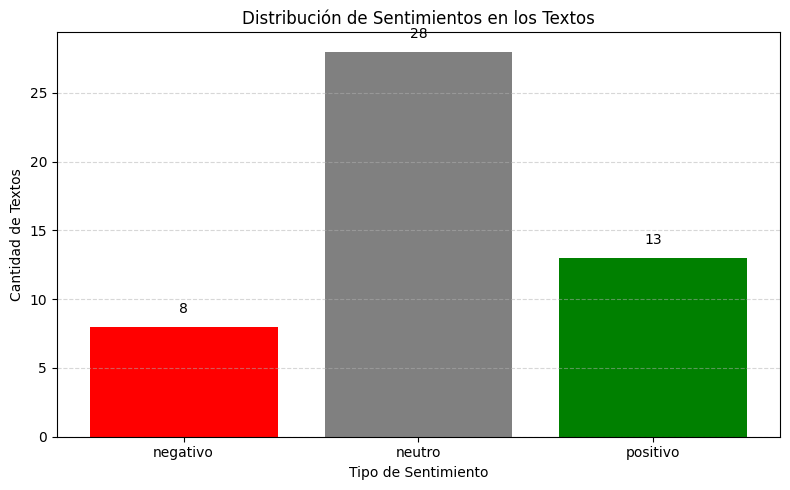

In [44]:
import matplotlib.pyplot as plt

# Contar cuántos hay de cada categoría de sentimiento
conteo_sentimientos = carlosestext['sentimiento'].value_counts()

# Ordenar para que siempre sea en el orden: negativo, neutro, positivo
orden = ['negativo', 'neutro', 'positivo']
conteo_sentimientos = conteo_sentimientos.reindex(orden, fill_value=0)

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(conteo_sentimientos.index, conteo_sentimientos.values, color=['red', 'gray', 'green'])

# Agregar etiquetas y título
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Cantidad de Textos')
plt.title('Distribución de Sentimientos en los Textos')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar los valores encima de cada barra
for i, valor in enumerate(conteo_sentimientos.values):
    plt.text(i, valor + 1, str(valor), ha='center')

plt.tight_layout()
plt.show()


In [45]:
for palabra, valor in list(dic_sentimientos_es.items())[:10]:
    print(f"{palabra}: {valor}")

abandonar: -2
abandonado: -2
abandonarse: -2
secuestrado: -2
secuestro: -2
secuestros: -2
aborrecer: -3
aborrecido: -3
aborrecible: -3
talento: 2


In [ ]:
#Estudiar como crear el lema de una palabra